In [68]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import datetime
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [69]:
pd.read_csv("all_car.csv", sep = ",")
df = pd.read_csv("all_car.csv", sep = ",").copy()
dfF  = pd.read_csv("all_car.csv", sep = ",").copy()

In [70]:
df.head()

,Unnamed: 0,_id,Id,Marka,Seri,Model,Yıl,Km,Renk,Vites,Yakıt,Sehir,Tarih,Fiyat
0,0,5e17986fbc3087fa6cafab9d,777731472,Alfa Romeo,147,1.6 TS Distinctive,2003,200.000,Gümüş Gri,Manuel,Benzin,Eskişehir,09 Ocak 2020,33.000 TL
1,1,5e17986fbc3087fa6cafab9e,653938830,Alfa Romeo,156,2.0 TS,1998,330.000,Kırmızı,Manuel,Benzin,İstanbul,08 Ocak 2020,23.500 TL
2,2,5e17986fbc3087fa6cafab9f,777024553,Alfa Romeo,Giulietta,1.4 TB MultiAir Distinctive,2011,158.380,Kırmızı,Manuel,Benzin,Denizli,07 Ocak 2020,84.900 TL
3,3,5e17986fbc3087fa6cafaba0,776951726,Alfa Romeo,156,1.6 TS,2000,305.000,Siyah,Manuel,Benzin,İstanbul,07 Ocak 2020,25.500 TL
4,4,5e17986fbc3087fa6cafaba1,776563595,Alfa Romeo,Giulietta,1.4 TB Progression Plus,2011,105.500,Beyaz,Manuel,Benzin,Konya,06 Ocak 2020,76.500 TL


In [71]:
df.dtypes

Unnamed: 0     int64
_id           object
Id             int64
Marka         object
Seri          object
Model         object
Yıl            int64
Km            object
Renk          object
Vites         object
Yakıt         object
Sehir         object
Tarih         object
Fiyat         object
dtype: object

# Veri Ön İşleme

In [72]:
df = df.iloc[:, 3:len(df)]

In [73]:
df.head()

,Marka,Seri,Model,Yıl,Km,Renk,Vites,Yakıt,Sehir,Tarih,Fiyat
0,Alfa Romeo,147,1.6 TS Distinctive,2003,200.000,Gümüş Gri,Manuel,Benzin,Eskişehir,09 Ocak 2020,33.000 TL
1,Alfa Romeo,156,2.0 TS,1998,330.000,Kırmızı,Manuel,Benzin,İstanbul,08 Ocak 2020,23.500 TL
2,Alfa Romeo,Giulietta,1.4 TB MultiAir Distinctive,2011,158.380,Kırmızı,Manuel,Benzin,Denizli,07 Ocak 2020,84.900 TL
3,Alfa Romeo,156,1.6 TS,2000,305.000,Siyah,Manuel,Benzin,İstanbul,07 Ocak 2020,25.500 TL
4,Alfa Romeo,Giulietta,1.4 TB Progression Plus,2011,105.500,Beyaz,Manuel,Benzin,Konya,06 Ocak 2020,76.500 TL


### Feature Engineering

In [74]:
#df['Km'] = df['Km'].apply(lambda x: re.sub('[."]', '', x))
df['Km'] = df['Km'].str.replace('.','')

C:\Users\yemre\AppData\Local\Temp\ipykernel_6720\1156556728.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Km'] = df['Km'].str.replace('.','')


In [75]:
df['Km'] = pd.to_numeric(df['Km'], errors='coerce')

In [76]:
df['Fiyat'] = df['Fiyat'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))

In [77]:
df['Fiyat'] = df['Fiyat'].str.replace(' TL','')

In [78]:
df['Fiyat'] = pd.to_numeric(df['Fiyat'], errors='coerce')

In [79]:
from datetime import datetime

In [80]:
import locale
locale.setlocale(locale.LC_ALL, '')

'Turkish_Turkey.1254'

In [81]:
df['Model']= df['Model'].astype(str)

In [82]:
df['Tarih'] =  pd.to_datetime(df['Tarih'], format='%d %B %Y')

In [83]:
df["Yas"]  = 2022-df["Yıl"]

In [84]:
from datetime import date


#a = datetime(2022,10,1)

In [85]:
b = df["Tarih"]

In [86]:
d = datetime.now()
print(d)

2023-02-03 12:40:49.028537


In [87]:
df["Ilan_Gunu"] = d-b

In [88]:
df["Km_fark"]  = 1000000 - df["Km"]

In [89]:
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 12:40:49


In [90]:
uzakliklar = {'Eskişehir':234, 'İstanbul':453, 'Denizli':477, 'Konya':259, 'İzmir':584, 'Antalya':543,
       'Ankara':0, 'Artvin':960, 'Aydın':596, 'Bursa':385, 'Kocaeli':342, 'Karaman':370,
       'Tekirdağ':583, 'Adana':492, 'Bingöl':889, 'Balıkesir':536, 'Hatay':689,
       'Afyonkarahisar':255, 'Kayseri':316, 'Mersin':468, 'Muğla':619, 'Kahramanmaraş':579,
       'Düzce':237, 'Bilecik':314, 'Gaziantep':654, 'Kütahya':312, 'Batman':1000, 'Adıyaman':738,
       'Rize':812, 'Osmaniye':581, 'Yozgat':214, 'Diyarbakır':900, 'Sakarya':305, 'Bolu':190,
       'Manisa':563, 'Uşak':367, 'Ağrı':1056, 'Ordu':558, 'Erzurum':876, 'Yalova':407, 'Amasya':331,
       'Burdur':421, 'Samsun':412, 'Aksaray':224, 'Zonguldak':266, 'Tokat':380, 'Edirne':685,
       'Şanlıurfa':793, 'Trabzon':733, 'Karabük':216, 'Kırşehir':183, 'Sivas':442, 'Bartın':286,
       'Kars':1078, 'Erzincan':690, 'Çorum':240, 'Sinop':409, 'Van':1215, 'Kastamonu':237, 'Kilis':718,
       'Şırnak':1158, 'Gümüşhane':762, 'Giresun':603, 'Malatya':653, 'Elazığ':751, 'Bitlis':1080,
       'Kırklareli':661, 'Çanakkale':665, 'Kırıkkale':74, 'Isparta':423, 'Siirt':1087,
       'Nevşehir':275, 'Mardin':987, 'Niğde':340, 'Muş':999, 'Çankırı':131, 'Bayburt':815,
       'Iğdır':1200,'Tunceli':814, 'Ardahan':1097, 'Hakkari':1348, 'Diğer':0000,
       'Güzelyurt':774, 'Girne':729}

In [91]:
df5=pd.DataFrame(uzakliklar.items(), columns=['Sehir', 'Uzaklik'])

In [92]:
dfSon=pd.merge(df, df5, on='Sehir', how='inner')

In [93]:
df.rename(columns={'Yıl':'Yil',"Yakıt":"Yakit"},inplace = True)

In [94]:
dfSon

,Marka,Seri,Model,Yıl,Km,Renk,Vites,Yakıt,Sehir,Tarih,Fiyat,Yas,Ilan_Gunu,Km_fark,Uzaklik
0,Alfa Romeo,147,1.6 TS Distinctive,2003,200000.0,Gümüş Gri,Manuel,Benzin,Eskişehir,2020-01-09,33000,19,1121 days 12:40:49.028537,800000.0,234
1,Alfa Romeo,GT,2.0 JTS Dis.Selespeed,2008,149000.0,Siyah,Yarı Otomatik,Benzin,Eskişehir,2019-12-19,65000,14,1142 days 12:40:49.028537,851000.0,234
2,Alfa Romeo,147,1.6 TS Distinctive,2004,226200.0,Mavi,Manuel,Benzin & LPG,Eskişehir,2019-12-13,40000,18,1148 days 12:40:49.028537,773800.0,234
3,Alfa Romeo,156,1.6 TS Progression,2004,266000.0,Siyah,Manuel,Benzin & LPG,Eskişehir,2019-10-22,26750,18,1200 days 12:40:49.028537,734000.0,234
4,Alfa Romeo,159,1.9 JTD Distinctive Plus,2011,280000.0,Siyah,Yarı Otomatik,Dizel,Eskişehir,2019-12-12,90000,11,1149 days 12:40:49.028537,720000.0,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99115,Mercedes - Benz,E Serisi,E 250 CDI Avantgarde,2011,175000.0,Siyah,Yarı Otomatik,Dizel,Diğer,2020-01-01,207500,11,1129 days 12:40:49.028537,825000.0,0
99116,Volkswagen,Passat,1.4 TSI BlueMotion Comfortline,2011,144000.0,Beyaz,Yarı Otomatik,Benzin,Diğer,2020-01-07,107000,11,1123 days 12:40:49.028537,856000.0,0
99117,Volkswagen,Jetta,1.6 TDi Trendline,2014,58000.0,Beyaz,Manuel,Dizel,Diğer,2020-01-05,120000,8,1125 days 12:40:49.028537,942000.0,0
99118,Mazda,323,1.5 GL,1994,202000.0,Siyah,Otomatik,Benzin,Güzelyurt,2019-12-17,8750,28,1144 days 12:40:49.028537,798000.0,774


In [95]:
dfSon = df

## Eksik Gözlem Analizi

In [96]:
df.isnull().sum()

Marka         0
Seri          0
Model         0
Yil           0
Km            2
Renk          0
Vites         0
Yakit         0
Sehir        12
Tarih         0
Fiyat         0
Yas           0
Ilan_Gunu     0
Km_fark       2
dtype: int64

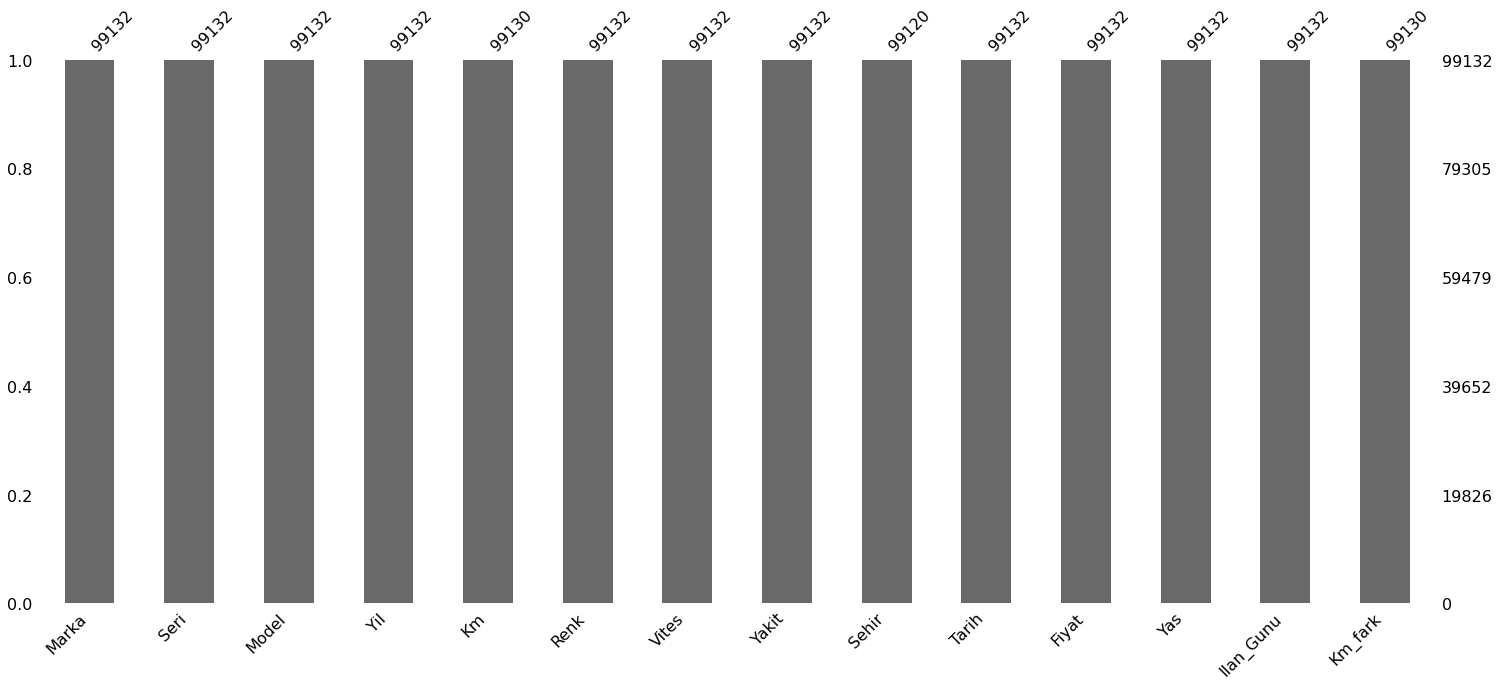

In [97]:
msno.bar(df);

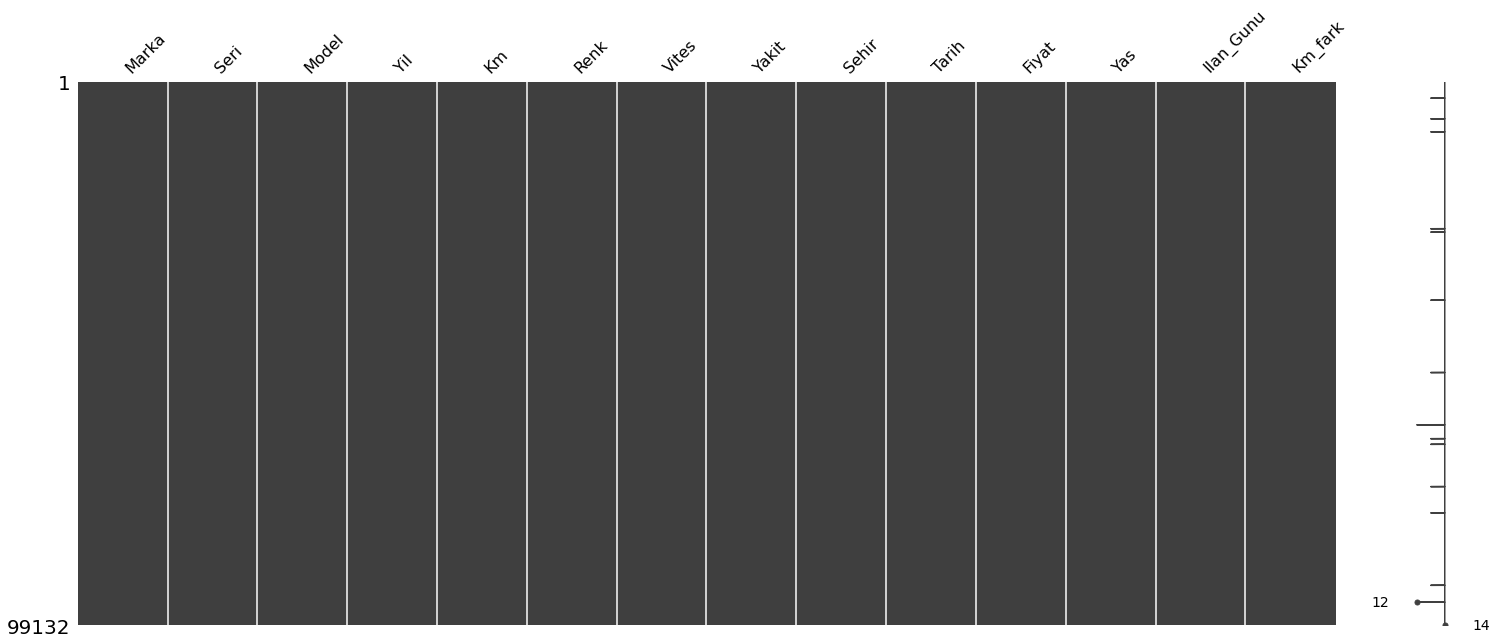

In [98]:
msno.matrix(df);

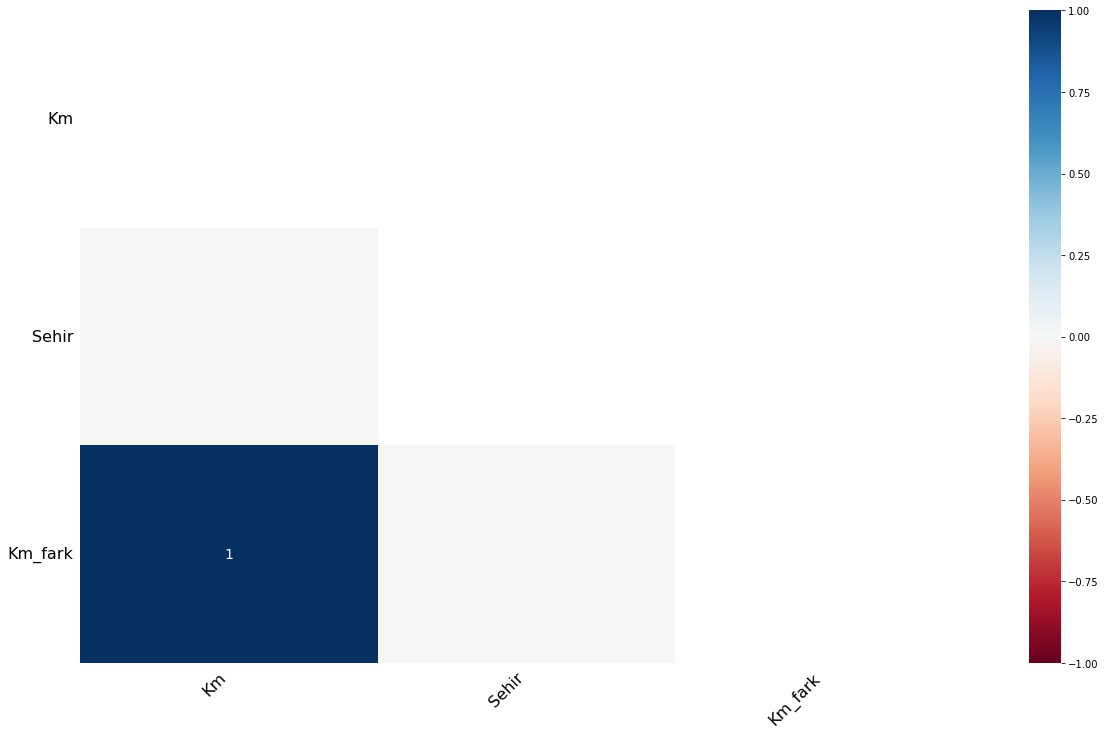

In [99]:
msno.heatmap(df);

In [100]:
df["Sehir"].fillna(df["Sehir"].mode()[0], inplace=True)

In [101]:
df.isnull().sum()

Marka        0
Seri         0
Model        0
Yil          0
Km           2
Renk         0
Vites        0
Yakit        0
Sehir        0
Tarih        0
Fiyat        0
Yas          0
Ilan_Gunu    0
Km_fark      2
dtype: int64

In [102]:
df["Km"].fillna(df["Km"].mean(), inplace=True)

In [103]:
df["Km_fark"].fillna(df["Km_fark"].mean(), inplace=True)

In [104]:
df.dropna(inplace=True)

In [105]:
df.isnull().sum()

Marka        0
Seri         0
Model        0
Yil          0
Km           0
Renk         0
Vites        0
Yakit        0
Sehir        0
Tarih        0
Fiyat        0
Yas          0
Ilan_Gunu    0
Km_fark      0
dtype: int64

In [106]:
# Eksik gözlem bulunan km değişken değerlerine değişken ortalama değeri atandı,
# şehir değişkeninedki eksiklikler değişkendeki en çokk tekrar eden İstanbul değeri ile giderildi.
# model değişkeninde değer atama yöntemlerinden herhangi biri uyumlu bulunamadığı için bu eksiklikler silme yöntemiyle giderildi.

In [107]:
df.dtypes

Marka                 object
Seri                  object
Model                 object
Yil                    int64
Km                   float64
Renk                  object
Vites                 object
Yakit                 object
Sehir                 object
Tarih         datetime64[ns]
Fiyat                  int64
Yas                    int64
Ilan_Gunu    timedelta64[ns]
Km_fark              float64
dtype: object

# Aykırı Gözlem Analizi

In [108]:
df_fiyat = df["Fiyat"]
df_fiyat

0         33000
1         23500
2         84900
3         25500
4         76500
          ...  
99127     91000
99128    425000
99129    418500
99130    108000
99131    567500
Name: Fiyat, Length: 99132, dtype: int64

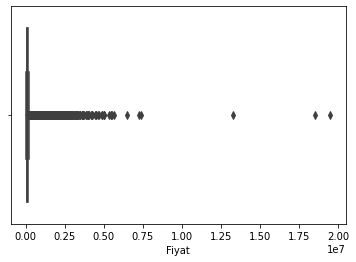

In [109]:
sns.boxplot(x = df_fiyat);

In [110]:
# qantil verileri küçükten büyüğe sıralayıp veri sayısının eşit parçalara böler.  
Q1 = df_fiyat.quantile(0.25)
Q3 = df_fiyat.quantile(0.75)
IQR = Q3-Q1 #çeyrekler açıklığı 

In [111]:
print("1. Çeyrek:", Q1)
print("3. Çeyrek:", Q3)
print("Çeyrekler Açıklığı:",IQR)

1. Çeyrek: 40750.0
3. Çeyrek: 108000.0
Çeyrekler Açıklığı: 67250.0


In [112]:
alt_sinir = Q1 - 0.3*IQR
ust_sinir = Q3 + 5*IQR

In [113]:
print("Alt Sınır:", alt_sinir)
print("Üst Sınır:", ust_sinir)

Alt Sınır: 20575.0
Üst Sınır: 444250.0


In [114]:
(df_fiyat < alt_sinir) | (df_fiyat > ust_sinir)

0        False
1        False
2        False
3        False
4        False
         ...  
99127    False
99128    False
99129    False
99130    False
99131     True
Name: Fiyat, Length: 99132, dtype: bool

In [115]:
aykiri_tf = (df_fiyat < alt_sinir)

In [116]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: Fiyat, dtype: bool

In [117]:
df_fiyat[aykiri_tf]

11        5500
12       18500
39       18000
56       13500
62        9250
         ...  
97646    12750
97648    15000
97711    20000
97910    20250
97931    18500
Name: Fiyat, Length: 5467, dtype: int64

In [118]:
df_fiyat[aykiri_tf].index

Int64Index([   11,    12,    39,    56,    62,   135,   141,   143,   144,
              146,
            ...
            95741, 95836, 97494, 97598, 97639, 97646, 97648, 97711, 97910,
            97931],
           dtype='int64', length=5467)

### Aykırı Değer Probleminin Çözümü

In [119]:
df_fiyat = pd.DataFrame(df_fiyat)

In [120]:
df_fiyat.shape

(99132, 1)

In [121]:
df_fiyat[~((df_fiyat < (alt_sinir)) | (df_fiyat > (ust_sinir))).any(axis = 1)]

,Fiyat
0,33000
1,23500
2,84900
3,25500
4,76500
...,...
99125,435000
99127,91000
99128,425000
99129,418500


In [122]:
t_df = df_fiyat[~((df_fiyat < (alt_sinir)) | (df_fiyat > (ust_sinir))).any(axis = 1)]

In [123]:
t_df.shape

(91909, 1)

In [124]:
t_df.max()

Fiyat    444000
dtype: int64

In [125]:
df["Fiyat"] = t_df

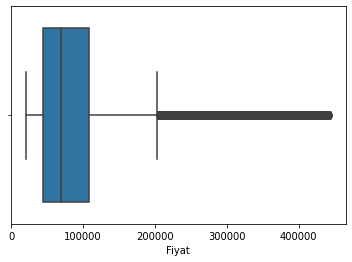

In [126]:
sns.boxplot(x = df["Fiyat"]);

In [127]:
df.isnull().sum()

Marka           0
Seri            0
Model           0
Yil             0
Km              0
Renk            0
Vites           0
Yakit           0
Sehir           0
Tarih           0
Fiyat        7223
Yas             0
Ilan_Gunu       0
Km_fark         0
dtype: int64

In [128]:
df.dropna(inplace=True)

In [131]:
df.columns

Index(['Marka', 'Seri', 'Model', 'Yil', 'Km', 'Renk', 'Vites', 'Yakit',
       'Sehir', 'Tarih', 'Fiyat', 'Yas', 'Ilan_Gunu', 'Km_fark'],
      dtype='object')

In [132]:
df = df[['Marka', 'Seri', 'Model', 'Yil', 'Km', 'Renk', 'Vites', 'Yakit',
       'Sehir', 'Tarih','Yas', 'Ilan_Gunu', 'Km_fark',  'Fiyat',]]

In [135]:
df.sample(6)

,Marka,Seri,Model,Yil,Km,Renk,Vites,Yakit,Sehir,Tarih,Yas,Ilan_Gunu,Km_fark,Fiyat
68641,Renault,Clio,1.4 Authentique,2006,93000.0,Gümüş Gri,Manuel,Benzin,Tokat,2020-01-06,16,1124 days 12:40:49.028537,907000.0,39500.0
80090,Skoda,Fabia,1.4 TDI Classic,2009,219000.0,Gri,Manuel,Dizel,Antalya,2020-01-05,13,1125 days 12:40:49.028537,781000.0,48500.0
79931,Skoda,Octavia,1.6 Ambiente,2004,284000.0,Lacivert,Otomatik,Benzin & LPG,Ankara,2020-01-09,18,1121 days 12:40:49.028537,716000.0,37750.0
56668,Opel,Insignia,2.0 T Grand Sport Excellence,2017,46000.0,Bordo,Otomatik,Benzin,İzmir,2019-12-27,5,1134 days 12:40:49.028537,954000.0,289500.0
9577,BMW,5 Serisi,525d xDrive Premium,2016,62000.0,Siyah,Yarı Otomatik,Dizel,Bilecik,2020-01-08,6,1122 days 12:40:49.028537,938000.0,400000.0
87053,Toyota,Corolla,1.6 Advance,2016,71000.0,Beyaz,Yarı Otomatik,Benzin & LPG,Diyarbakır,2019-12-16,6,1145 days 12:40:49.028537,929000.0,125000.0


# NLP

In [ ]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yemre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import textblob
from textblob import TextBlob

In [ ]:
df["Marka"].apply(lambda x: TextBlob(x).words)

0        [Alfa, Romeo]
1        [Alfa, Romeo]
2        [Alfa, Romeo]
3        [Alfa, Romeo]
4        [Alfa, Romeo]
             ...      
99127          [Volvo]
99128          [Volvo]
99129          [Volvo]
99130          [Volvo]
99131          [Volvo]
Name: Marka, Length: 99132, dtype: object

In [ ]:
df["Model"].apply(lambda x: TextBlob(x).words)

0                  [1.6, TS, Distinctive]
1                               [2.0, TS]
2        [1.4, TB, MultiAir, Distinctive]
3                               [1.6, TS]
4            [1.4, TB, Progression, Plus]
                       ...               
99127                      [2.4, D5, VIP]
99128              [2.0, D, D4, Momentum]
99129           [2.0, D, D4, Inscription]
99130                  [1.6, D, R-Design]
99131           [2.0, D, D5, Inscription]
Name: Model, Length: 99132, dtype: object

In [ ]:
df["Seri"].apply(lambda x: TextBlob(x).words)

0              [147]
1              [156]
2        [Giulietta]
3              [156]
4        [Giulietta]
            ...     
99127          [S80]
99128          [S90]
99129          [S90]
99130          [V40]
99131          [S90]
Name: Seri, Length: 99132, dtype: object

In [ ]:
df["Renk"].apply(lambda x: TextBlob(x).words)

0        [Gümüş, Gri]
1           [Kırmızı]
2           [Kırmızı]
3             [Siyah]
4             [Beyaz]
             ...     
99127           [Gri]
99128         [Beyaz]
99129           [Gri]
99130         [Beyaz]
99131           [Gri]
Name: Renk, Length: 99132, dtype: object

In [ ]:
df["Seri"].value_counts()

Corolla           3879
Civic             3629
Astra             3507
3 Serisi          3464
Focus             3017
                  ... 
Regata               1
Cougar               1
Crown Victoria       1
Orion                1
Thesis               1
Name: Seri, Length: 600, dtype: int64

In [ ]:
df.Vites.unique()

array(['Manuel', 'Yarı Otomatik', 'Otomatik'], dtype=object)

In [ ]:
df["Vites"] = df.Vites.map({'Manuel' : 1 , 'Yarı Otomatik' : 2 ,'Otomatik' : 3})

In [ ]:
df.Yakit.unique()

array(['Benzin', 'Benzin & LPG', 'Dizel', 'Hybrid', 'Elektrik'],
      dtype=object)

In [ ]:
df["Yakıt"] = df.Yakıt.map({'Benzin': 1 , 'Benzin & LPG': 2 , 'Dizel': 3 , 'Hybrid': 4 , 'Elektrik': 5 })

In [ ]:
df.Yakit.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [ ]:
df.dtypes

Marka                 object
Seri                  object
Model                 object
Yil                    int64
Km                   float64
Renk                  object
Vites                 object
Yakit                 object
Sehir                 object
Tarih         datetime64[ns]
Fiyat                  int64
Yas                    int64
Ilan_Gunu    timedelta64[ns]
Km_fark              float64
dtype: object

In [ ]:
#df['Km'] = df['Km'].apply(lambda x: re.sub('[."]', '', x))
    #df['Km'] = df['Km'].str.replace('.','')

# Veri Görselleştirme

c:\Users\yemre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Car Price Spread'}, ylabel='Fiyat'>

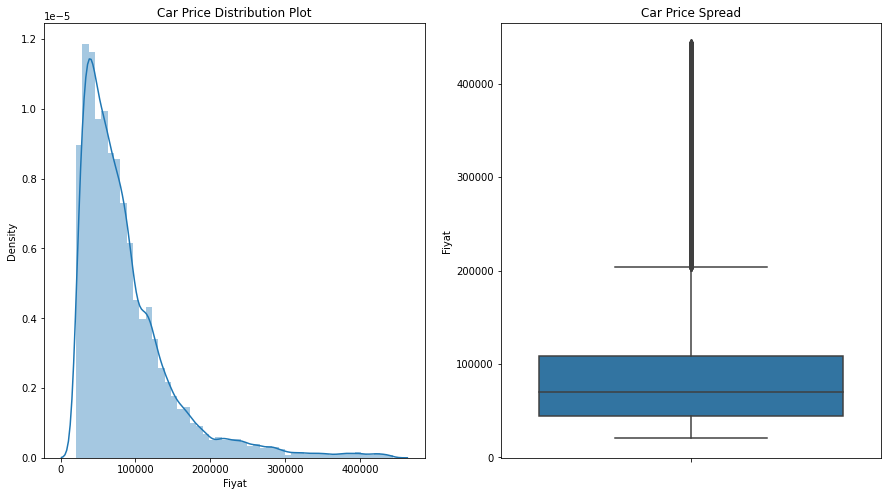

In [136]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.Fiyat)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.Fiyat)


c:\Users\yemre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


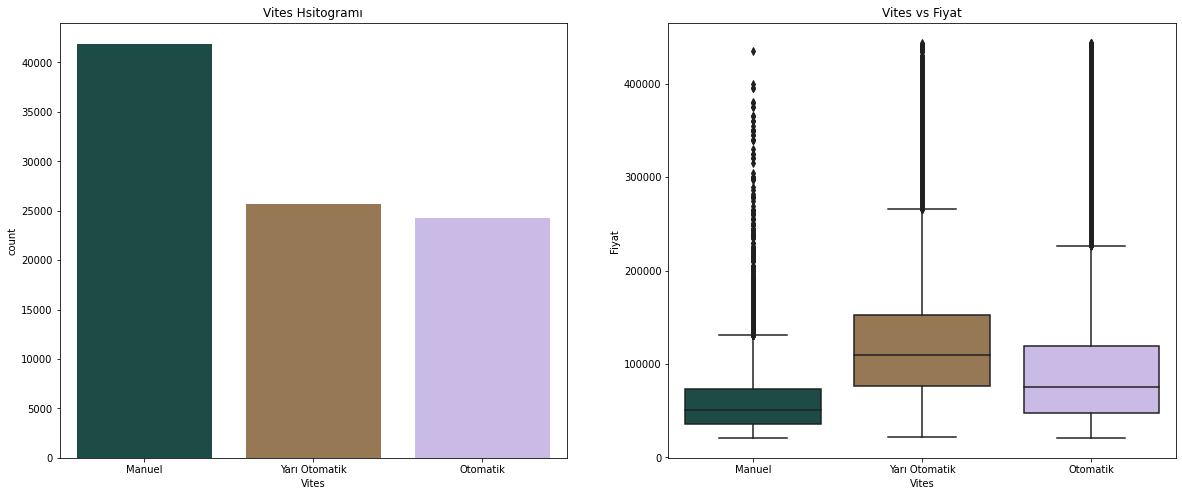

In [137]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Vites Hsitogramı')
sns.countplot(df.Vites, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Vites vs Fiyat')
sns.boxplot(x=df.Vites, y=df.Fiyat, palette=("cubehelix"))

plt.show();

c:\Users\yemre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


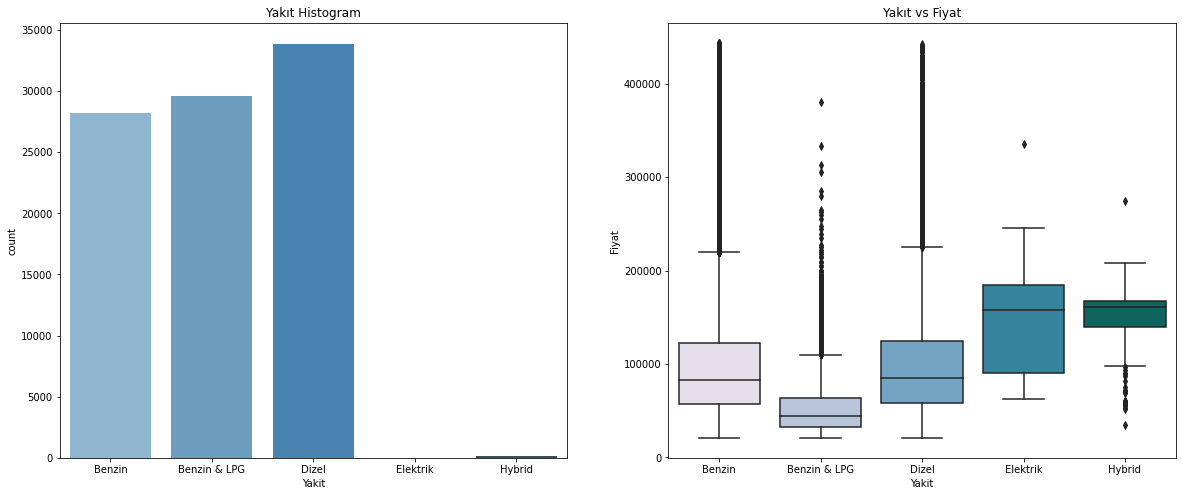

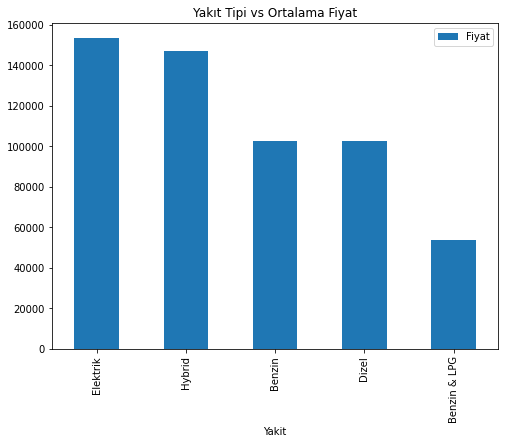

In [138]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Yakıt Histogram')
sns.countplot(df.Yakit, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Yakıt vs Fiyat')
sns.boxplot(x=df.Yakit, y=df.Fiyat, palette=("PuBuGn"))

plt.show()

dfO = pd.DataFrame(df.groupby(['Yakit'])['Fiyat'].mean().sort_values(ascending = False))
dfO.plot.bar(figsize=(8,6))
plt.title('Yakıt Tipi vs Ortalama Fiyat')

plt.show();

In [139]:
df.columns

Index(['Marka', 'Seri', 'Model', 'Yil', 'Km', 'Renk', 'Vites', 'Yakit',
       'Sehir', 'Tarih', 'Yas', 'Ilan_Gunu', 'Km_fark', 'Fiyat'],
      dtype='object')

In [140]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)

c:\Users\yemre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


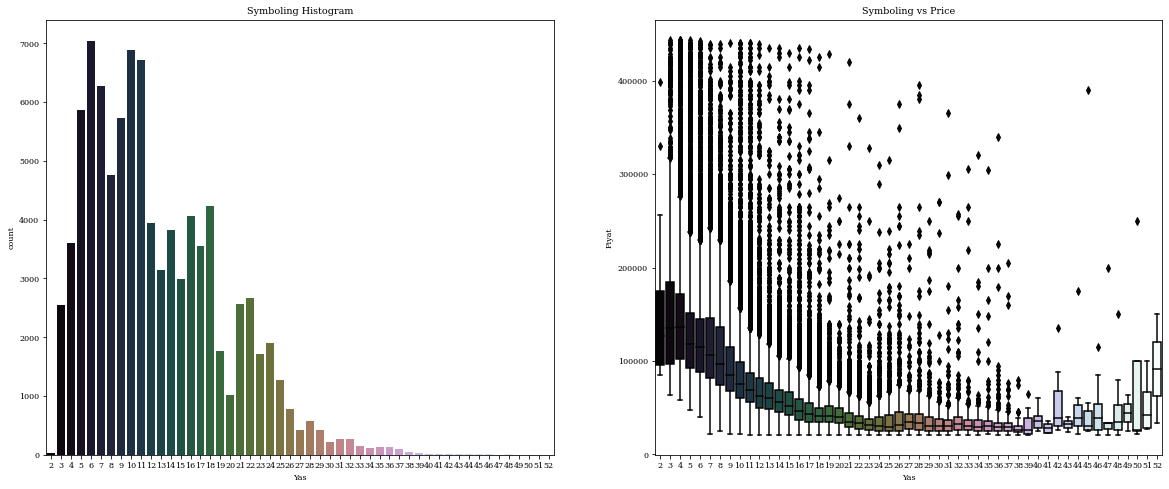

In [141]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df.Yas, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.Yas, y=df.Fiyat, palette=("cubehelix"))

plt.show()

<Figure size 3240x1440 with 0 Axes>

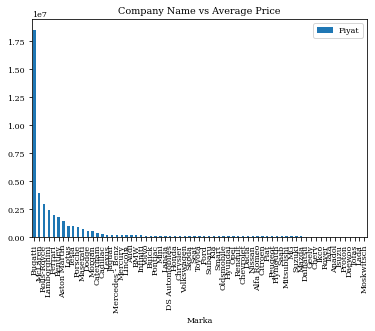

In [ ]:
plt.figure(figsize=(45, 20))

dfK = pd.DataFrame(df.groupby(['Marka'])['Fiyat'].mean().sort_values(ascending = False))
dfK.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

c:\Users\yemre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\yemre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


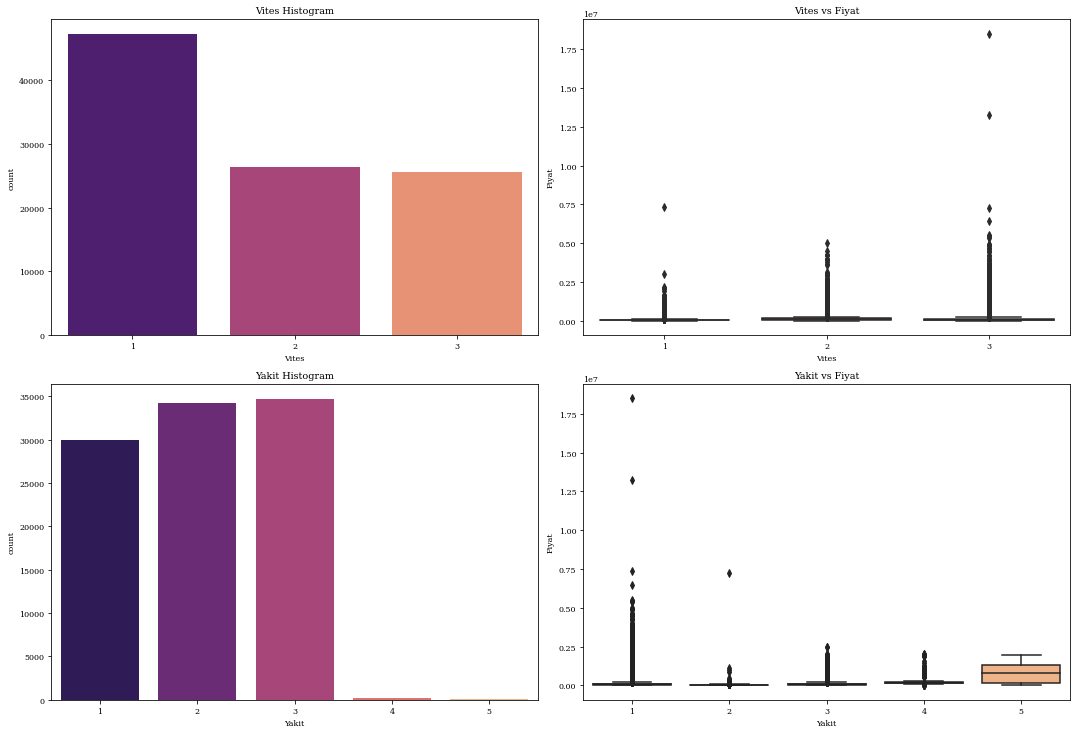

In [ ]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Fiyat')
    sns.boxplot(x=df[x], y=df.Fiyat, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('Vites', 1)
plot_count('Yakit', 3)

plt.tight_layout()

In [ ]:
df.columns

Index(['Marka', 'Seri', 'Model', 'Yil', 'Km', 'Renk', 'Vites', 'Yakit',
       'Sehir', 'Tarih', 'Fiyat', 'Yas', 'Ilan_Gunu', 'Km_Fark'],
      dtype='object')

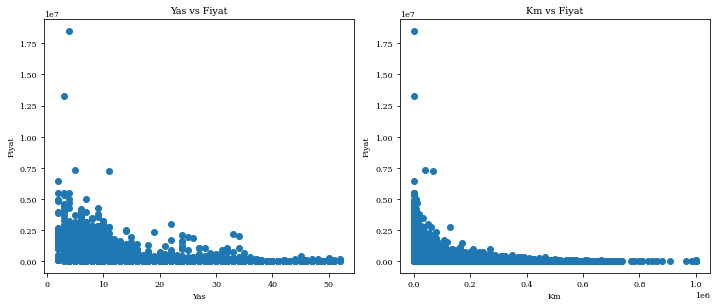

In [ ]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['Fiyat'])
    plt.title(x+' vs Fiyat')
    plt.ylabel('Fiyat')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Yas', 1)
scatter('Km', 2)

plt.tight_layout()

<Figure size 1800x432 with 0 Axes>

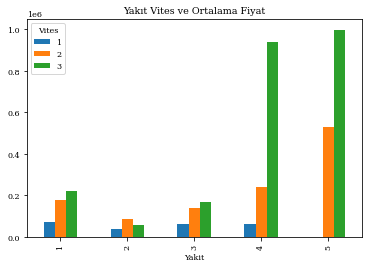

In [ ]:
plt.figure(figsize=(25, 6))

dfw = pd.DataFrame(df.groupby(['Yakit','Vites'])['Fiyat'].mean().unstack(fill_value=0))
dfw.plot.bar()
plt.title('Yakıt Vites ve Ortalama Fiyat')
plt.show();

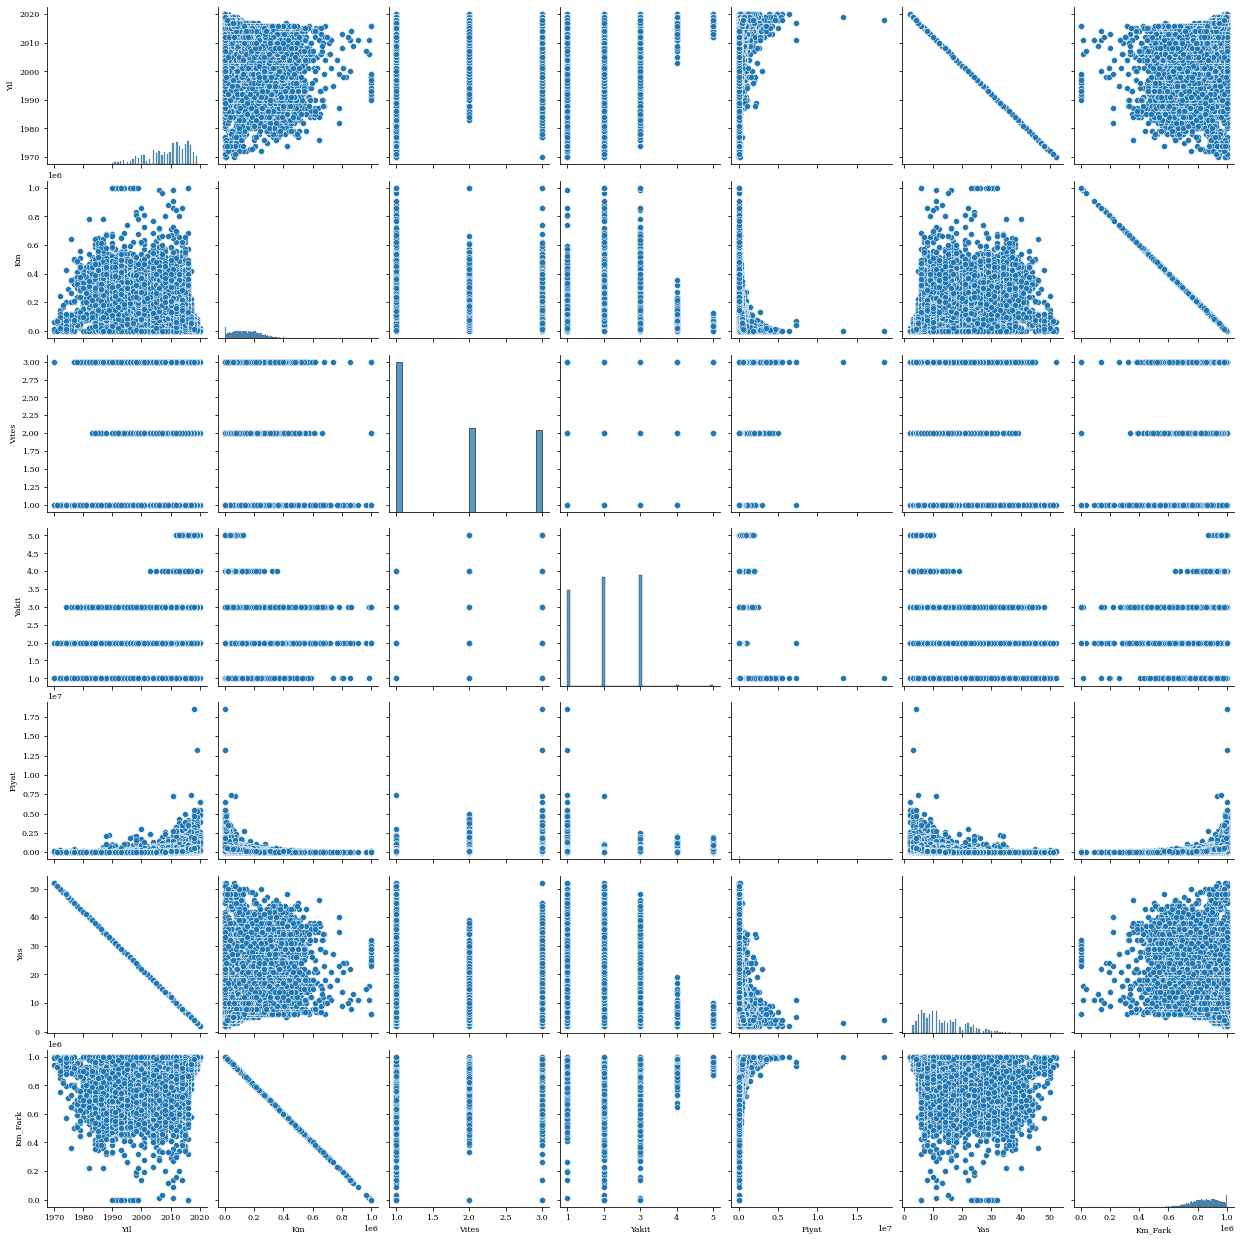

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Yil,99129.0,2008.730109,7.466973,1970.0,2004.0,2011.0,2015.0,2020.0
Km,99129.0,149457.645212,95829.701446,0.0,75000.0,142000.0,211000.0,1000000.0
Vites,99129.0,1.782818,0.829185,1.0,1.0,2.0,3.0,3.0
Yakit,99129.0,2.054121,0.815157,1.0,1.0,2.0,3.0,5.0
Fiyat,99129.0,100409.306762,194125.40385,3000.0,40750.0,67000.0,108000.0,18500000.0
Yas,99129.0,13.269891,7.466973,2.0,7.0,11.0,18.0,52.0
Ilan_Gunu,99129,961 days 01:42:02.549817776,12 days 17:08:54.193438695,952 days 09:50:14.127459,954 days 09:50:14.127459008,957 days 09:50:14.127459008,965 days 09:50:14.127459008,1338 days 09:50:14.127459
Km_Fark,99129.0,850542.354788,95829.701446,0.0,789000.0,858000.0,925000.0,1000000.0


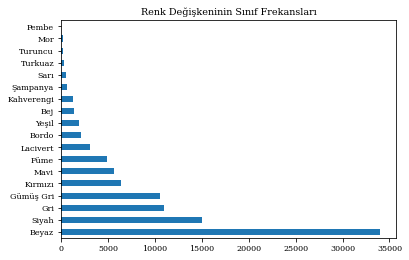

In [ ]:
df["Renk"].value_counts().plot.barh().set_title("Renk Değişkeninin Sınıf Frekansları");

In [ ]:
df.columns

Index(['Marka', 'Seri', 'Model', 'Yil', 'Km', 'Renk', 'Vites', 'Yakit',
       'Sehir', 'Tarih', 'Fiyat', 'Yas', 'Ilan_Gunu', 'Km_Fark'],
      dtype='object')

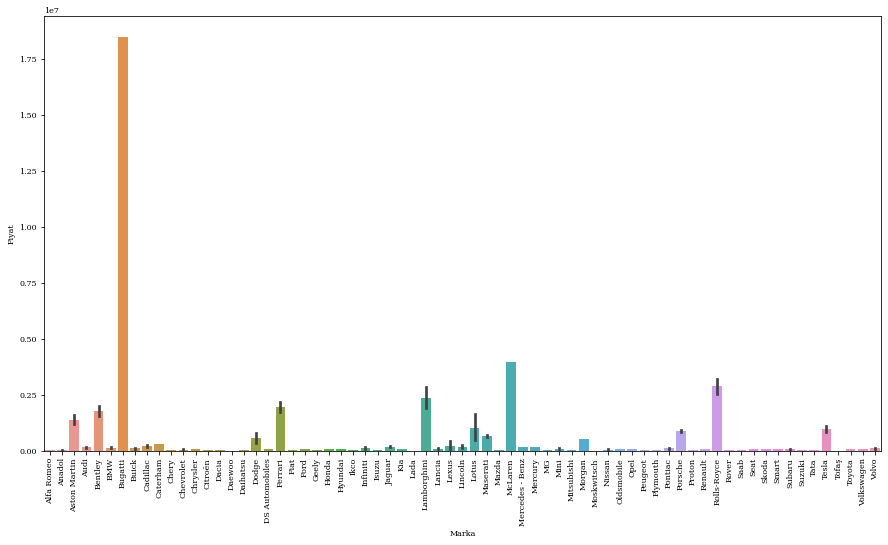

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Marka', y = 'Fiyat',data = df);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

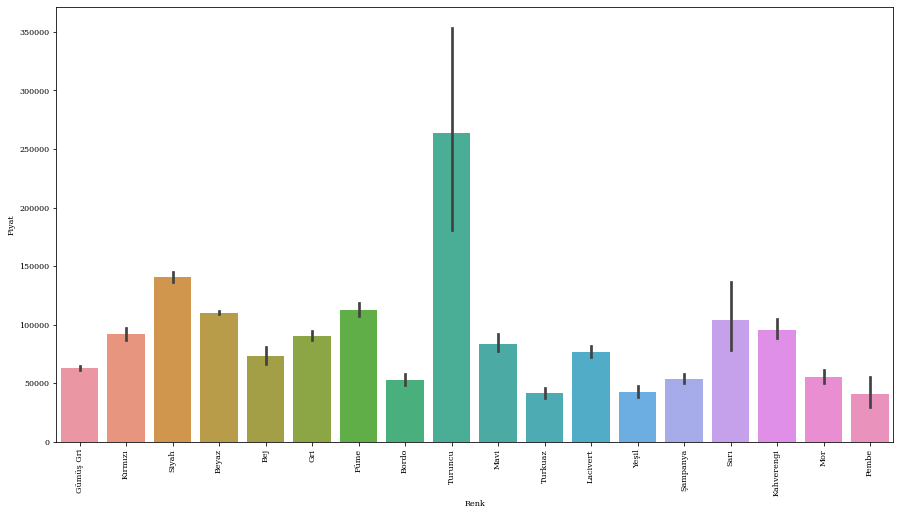

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Renk', y = 'Fiyat',data = df);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

In [ ]:
df.groupby(["Marka","Seri","Model","Km","Yas"])["Fiyat"].mean().tail(25) # önce cuta gör sonra colora göre gruplave sonuçta price değişkenine göre ortlama al

Marka  Seri               Model           Km        Yas
Volvo  V70                2.0 T           320000.0  15      72000.0
                                          360000.0  17      53000.0
                                          368000.0  22      45750.0
                                          370000.0  22      52500.0
                          2.0 T5          229000.0  24      63000.0
                                          270000.0  22      40000.0
                                          275000.0  24      39000.0
                                          300000.0  22      42500.0
                          2.3 T-5         300000.0  21      77000.0
                          2.4             209000.0  20      51500.0
                          2.4 D5 Premium  169990.0  14      84250.0
                                          182000.0  12     105000.0
                                          185000.0  12     110900.0
                                          398500.0  14      

In [ ]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 10}

plt.rc('font', **font)

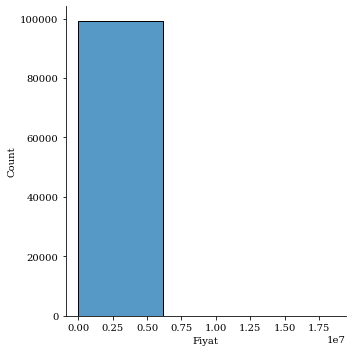

In [ ]:
sns.displot(df.Fiyat,bins =3, kde = False)

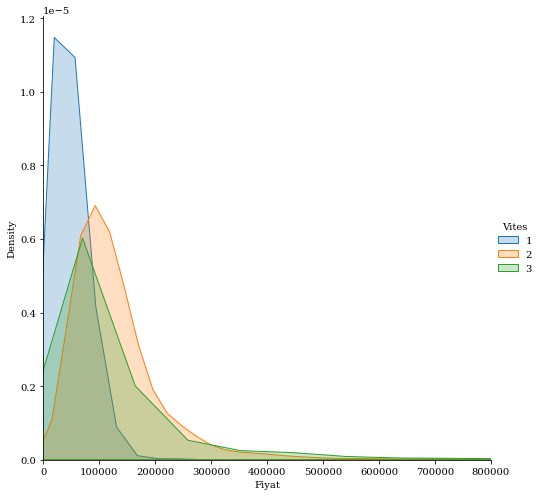

In [ ]:
(sns
 .FacetGrid(df,
              hue = "Vites",
              height = 7 ,
              xlim = (0, 800000))
 .map(sns.kdeplot, "Fiyat", shade = True)
 .add_legend()); 

In [ ]:
df["Marka"].value_counts()

Mercedes - Benz    7612
Volkswagen         7516
Opel               7477
BMW                7007
Renault            6159
                   ... 
Mercury               1
Bugatti               1
McLaren               1
Isuzu                 1
Oldsmobile            1
Name: Marka, Length: 69, dtype: int64

In [ ]:
df["Seri"].value_counts()

Corolla        3879
Civic          3629
Astra          3507
3 Serisi       3464
Focus          3017
               ... 
ZR                1
650S Spider       1
305               1
Laser             1
F488              1
Name: Seri, Length: 599, dtype: int64

In [ ]:
df.columns

Index(['Marka', 'Seri', 'Model', 'Yil', 'Km', 'Renk', 'Vites', 'Yakit',
       'Sehir', 'Tarih', 'Fiyat', 'Yas', 'Ilan_Gunu', 'Km_Fark'],
      dtype='object')

In [ ]:
df["Sehir"].value_counts()

İstanbul     24842
Ankara       10744
İzmir         5747
Antalya       4298
Bursa         3853
             ...  
Tunceli         36
Ardahan         35
Diğer            5
Güzelyurt        1
Girne            1
Name: Sehir, Length: 84, dtype: int64

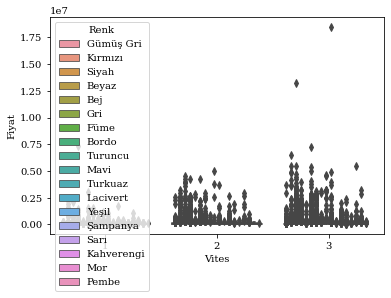

In [ ]:
sns.boxplot(x = "Vites", y = "Fiyat", hue = "Renk", data =df);

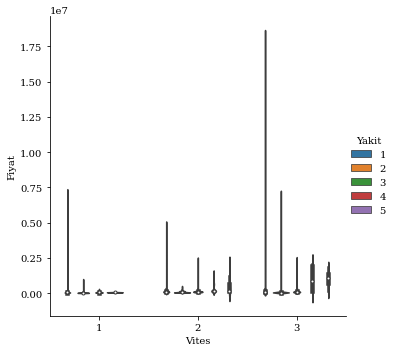

In [ ]:
sns.catplot(x = "Vites", y = "Fiyat", hue = "Yakit", kind = "violin", data = df);

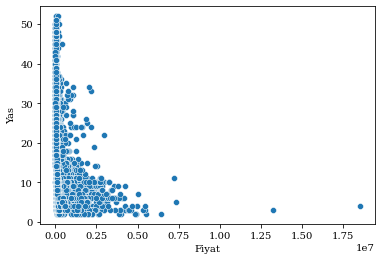

In [ ]:
sns.scatterplot(x = "Fiyat", y = "Yas", data = df);

In [ ]:
df["Fiyat"].max()

18500000

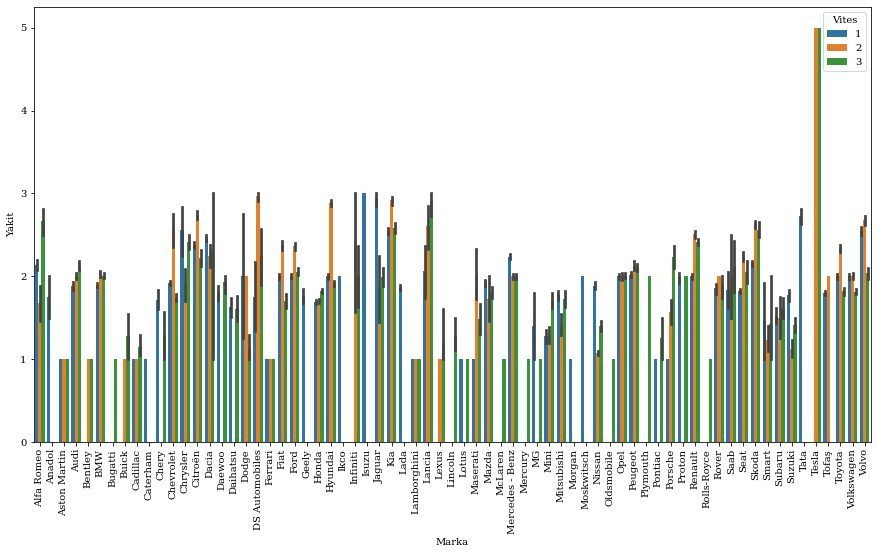

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Marka', y = 'Yakit',hue="Vites",data = df);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

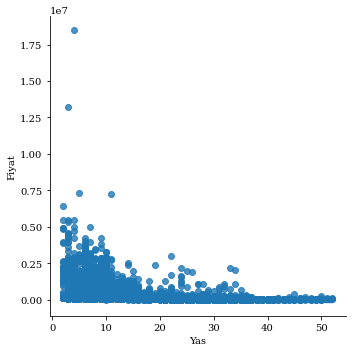

In [ ]:
sns.lmplot(y="Fiyat", x = "Yas", data=df)

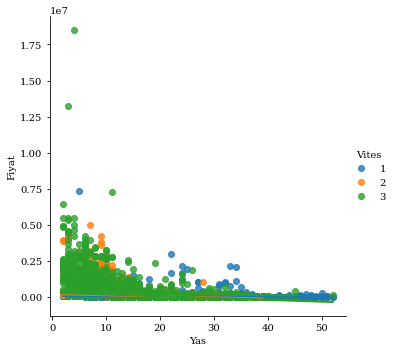

In [ ]:
sns.lmplot(x = "Yas", y = "Fiyat", hue = "Vites", data = df);

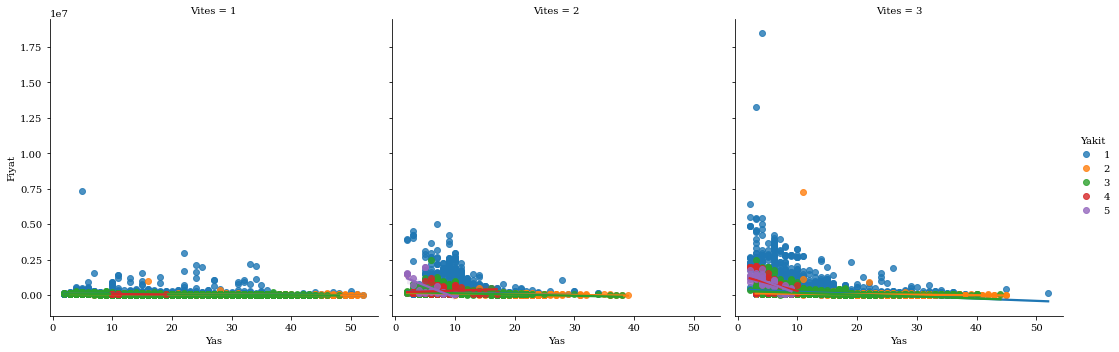

In [ ]:
sns.lmplot(y = "Fiyat", x = "Yas", hue = "Yakit", col = "Vites", data = df);

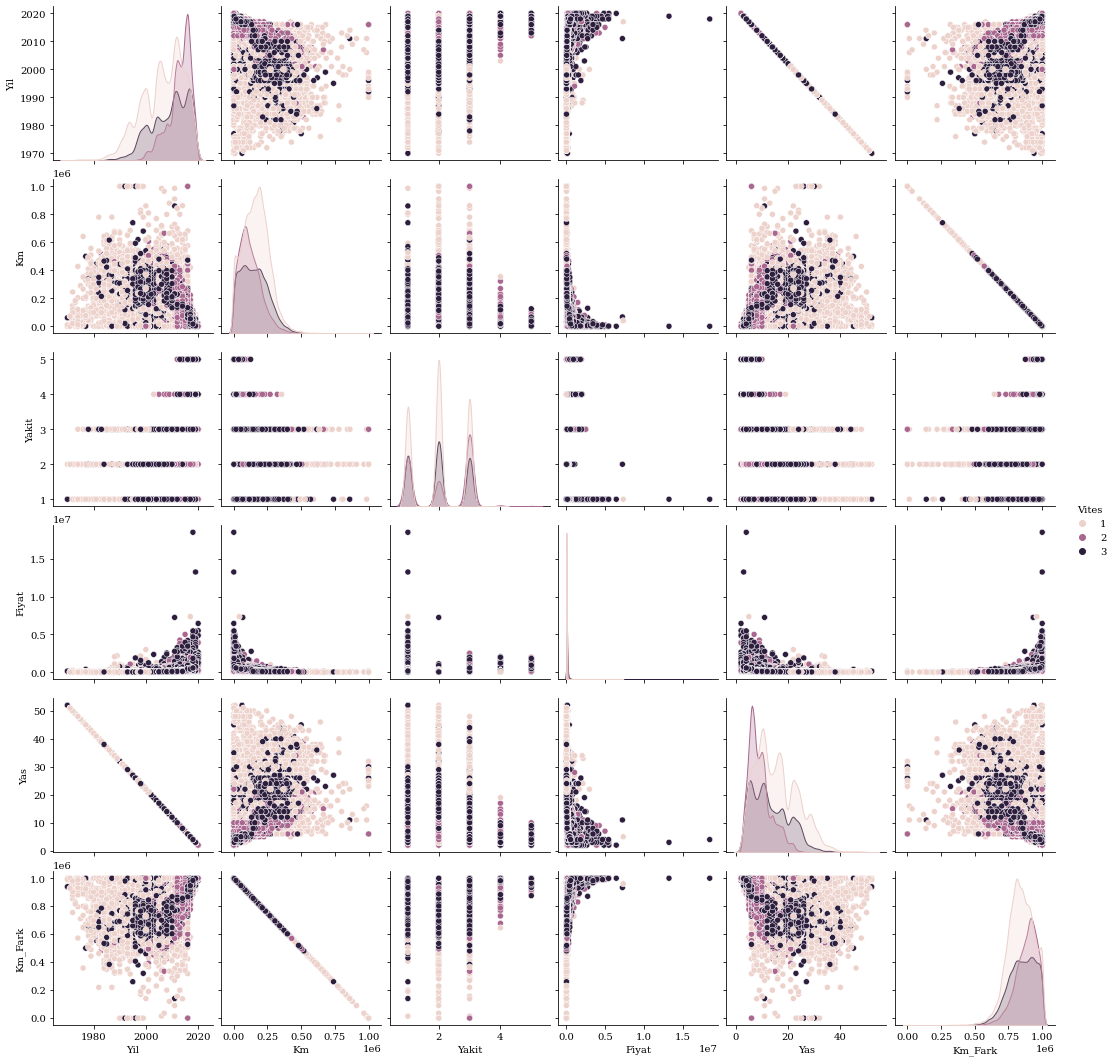

In [ ]:
#sns.pairplot(df, hue = "Vites");

In [ ]:
df.columns

Index(['Marka', 'Seri', 'Model', 'Yil', 'Km', 'Renk', 'Vites', 'Yakit',
       'Sehir', 'Tarih', 'Fiyat', 'Yas', 'Ilan_Gunu', 'Km_Fark'],
      dtype='object')

In [ ]:
df_num = df.select_dtypes(include = ["float64", "int64"]) 